In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re
import numpy as np

from csv import writer

In [2]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #measured just on nipples
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)' #measured above nipple
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'

meausred_weight='Weight (kg)'

thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'
measured_shape_val="Measured weight with shape"
measured_without_shape_val='Measured Weight without shape'
reported_shape_val="Reported Weight with shape"
reported_without_shape_val='Reported Weight without shape'



demographic=[age, height, weight, shoe_size,'shape','ratio',inverted_triangle,rectangle,triangle,meausred_weight]

measurement=[waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest,malleolus_height_inner,malleolus_height_outer]
# italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pants_size]
# italy_measurements=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest,meausred_weight]
additional=[subject_number,pants_size]

#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

In [3]:
measured_shape=pd.read_csv('./female_pred_with_shape(measured).csv',skipinitialspace=True,usecols=measurement)
measured_without_shape=pd.read_csv('./female_pred_without_shape(measured).csv',skipinitialspace=True,usecols=measurement)
reported_shape=pd.read_csv('./female_pred_with_shape(reported).csv',skipinitialspace=True,usecols=measurement)
reported_without_shape=pd.read_csv('./female_pred_without_shape(reported).csv',skipinitialspace=True,usecols=measurement)
y_test=pd.read_csv('./female_target_with_shape(measured).csv',skipinitialspace=True,usecols=measurement)
# X_test=pd.read_csv('./X_test.csv',skipinitialspace=True,usecols=demographic)
# y_test=pd.read_csv('./y_test.csv',skipinitialspace=True,usecols=measurement)
# y_test=y_test/10

FileNotFoundError: [Errno 2] No such file or directory: './X_test.csv'

In [4]:
def plot_error_distribution(array,title):
    plt.subplots(figsize=(8,4))
    #Set X-Axis range
    
    plt.title('Model Error Distribution:' + title)
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

In [5]:
def plot_box_two(arr_1,arr_2,column_1,column_2):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1,arr_2])
    plt.xticks([1, 2], [column_1, column_2], rotation=10)
    plt.show()

In [6]:
def plot_box(arr_1,column_1):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1])
    # plt.xticks([1, 2], [column_1], rotation=10)
    plt.show()

In [7]:

# measured_shape = X_test.merge(measured_shape,left_index=True,right_index=True)
# measured_without_shape = X_test.merge(measured_without_shape,left_index=True,right_index=True)
# reported_shape = X_test.merge(reported_shape,left_index=True,right_index=True)
# reported_without_shape = X_test.merge(reported_without_shape,left_index=True,right_index=True)
# target = X_test.merge(y_test,left_index=True,right_index=True)


In [8]:
plt.figure(figsize=(15,15))
result=X_test.merge(y_test,left_index=True,right_index=True)
result.drop(['shape','ratio',inverted_triangle,rectangle,triangle],axis=1,inplace=True)

corr=result.corr()
# # corr_measured_shape=corr.drop([height,age,shoe_size],axis=1)
# # print(corr_measured_shape[[weight,meausred_weight]])
sns.heatmap(corr[measurement],annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

NameError: name 'X_test' is not defined

<Figure size 1080x1080 with 0 Axes>

In [9]:
measured_shape_ERROR=(y_test-measured_shape).abs()
measured_without_shape_ERROR=(y_test-measured_without_shape).abs()
reported_shape_ERROR=(y_test-reported_shape).abs()
reported_without_shape_ERROR=(y_test-reported_without_shape).abs()

measured_shape_ERROR.to_csv("./result/measured_shape_error.csv",encoding='utf-8',index=False)
measured_without_shape_ERROR.to_csv("./result/measured_without_shape_error.csv",encoding='utf-8',index=False)
reported_shape_ERROR.to_csv("./result/reported_shape_error.csv",encoding='utf-8',index=False)
reported_without_shape_ERROR.to_csv("./result/reported_without_shape_error.csv",encoding='utf-8',index=False)



print(measured_shape_ERROR.median(axis=0))
print(measured_shape_ERROR.max(axis=0))

print(measured_without_shape_ERROR.median(axis=0))
print(measured_without_shape_ERROR.max(axis=0))

print(reported_shape_ERROR.median(axis=0))
print(reported_shape_ERROR.max(axis=0))

print(reported_without_shape_ERROR.median(axis=0))
print(reported_without_shape_ERROR.max(axis=0))

NameError: name 'y_test' is not defined

In [10]:



with open('./result/measured_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(measured_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(measured_shape_ERROR.max(axis=0))


with open('./result/measured_without_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(measured_without_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(measured_without_shape_ERROR.max(axis=0))

with open('./result/reported_shape_ERROR.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(reported_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(reported_shape_ERROR.max(axis=0))


with open('./result/reported_without_shape_error.csv', 'a') as csv_file:
    # dict_object = csv.DictWriter(csv_file, fieldnames=measured_shape_ERROR) 
    csv_writer=writer(csv_file)
    csv_writer.writerow(["MEDIAN"])
    csv_writer.writerow(reported_without_shape_ERROR.median(axis=0))
    csv_writer.writerow(["MAX"])
    csv_writer.writerow(reported_without_shape_ERROR.max(axis=0))


FileNotFoundError: [Errno 2] No such file or directory: './result/measured_shape_error.csv'

In [ ]:
dict={measured_shape_val:measured_shape,measured_without_shape_val:measured_without_shape,reported_shape_val:reported_shape,reported_without_shape_val:reported_without_shape}

Upper & lower quartiles distribution - whats the error range of 70%, 80%, 90% percentiles 

In [11]:
for feature in measurement:
    with_shape_target=y_test[feature].to_numpy()
    with_shape_pred=reported_shape[feature].to_numpy()
    with_shape_error=(np.subtract(with_shape_target,with_shape_pred))

    without_shape_target=y_test[feature].to_numpy()
    without_shape_pred=reported_without_shape[feature].to_numpy()
    without_shape_error=(np.subtract(without_shape_target,without_shape_pred))
    plt.hist(with_shape_error, alpha=0.5)
    plt.title(feature+" error dsitrubution")
    plt.hist(without_shape_error, alpha=0.5)
    plt.legend(['with body shape','without body shape'])
    plt.show()


# plt.hist(chest_error, alpha=0.5)

# plt.hist(chest_error_u, alpha=0.5)
# plt.legend(['with body shape','without body shape'])

NameError: name 'y_test' is not defined

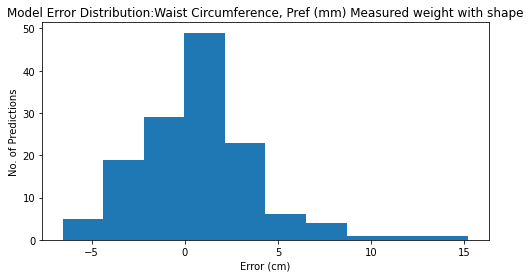

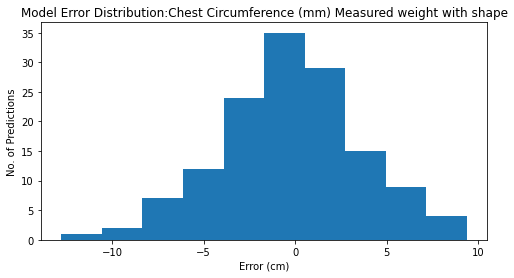

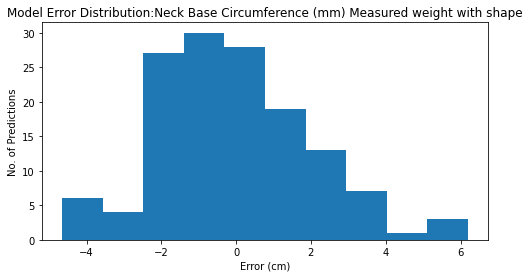

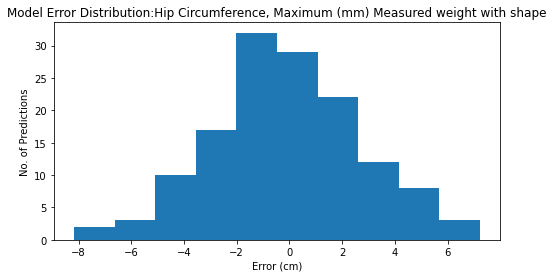

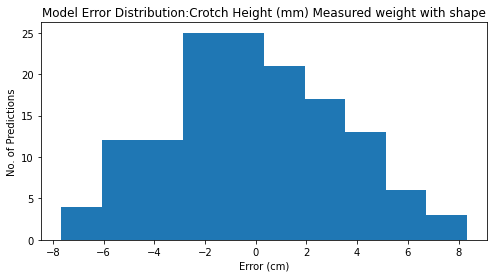

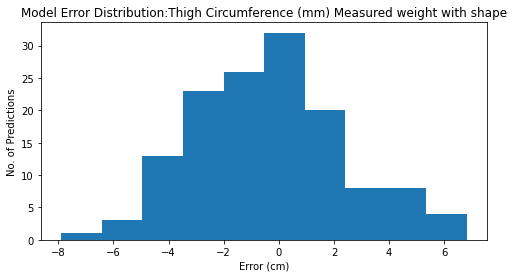

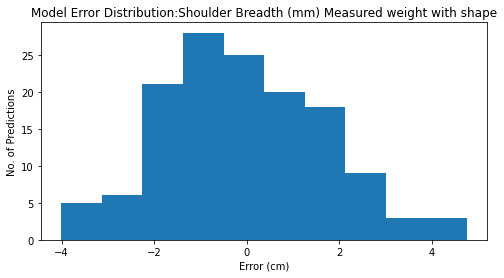

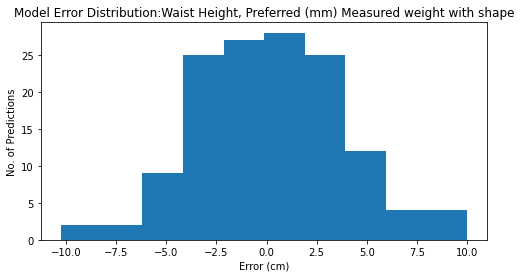

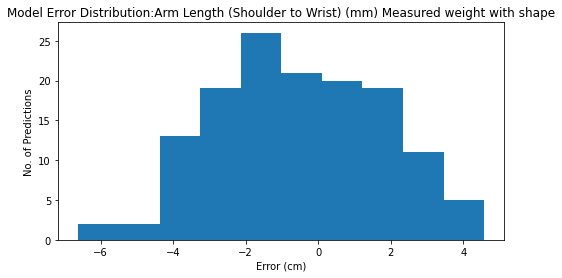

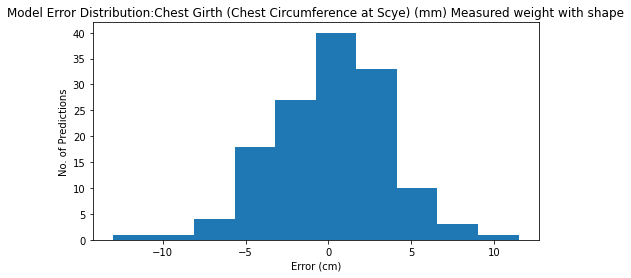

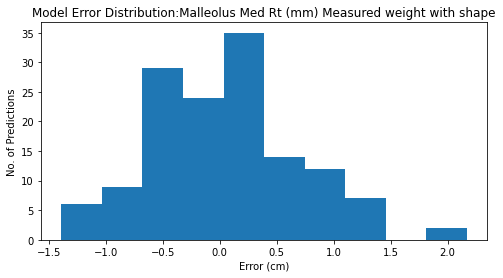

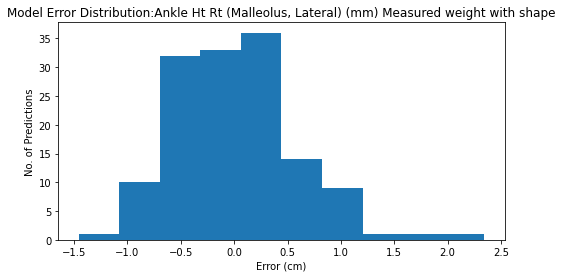

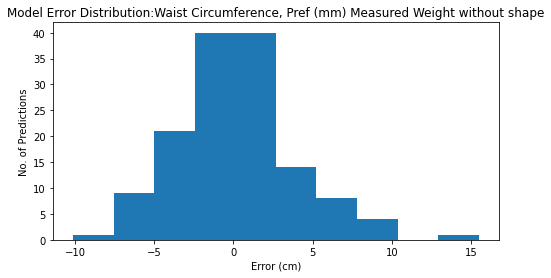

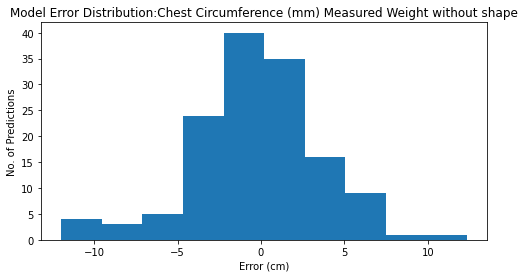

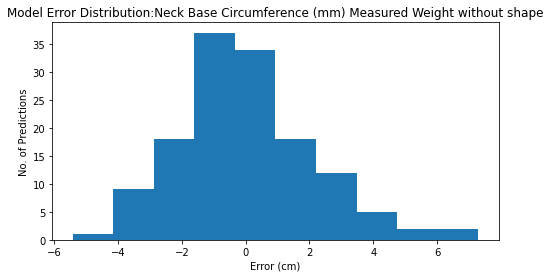

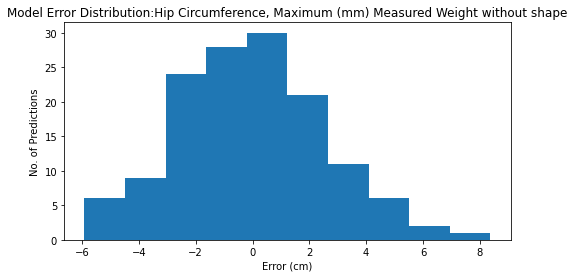

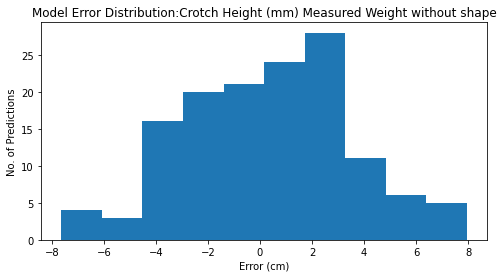

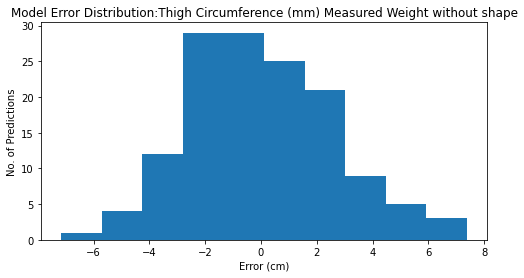

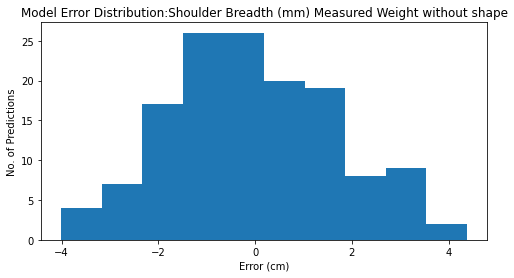

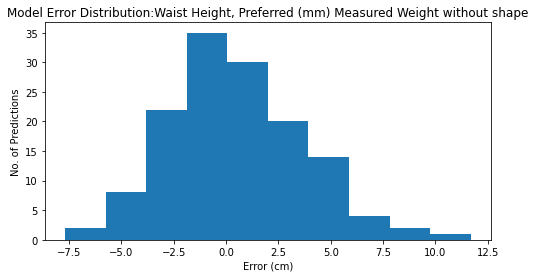

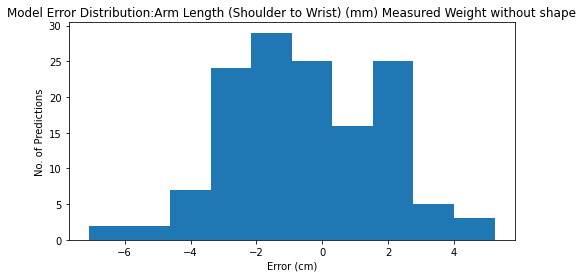

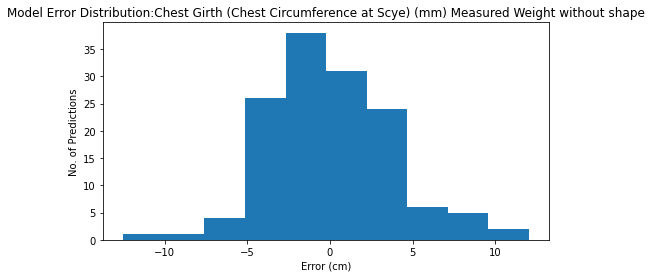

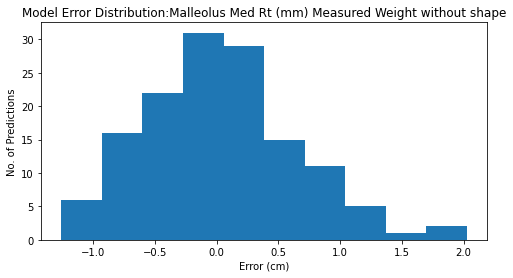

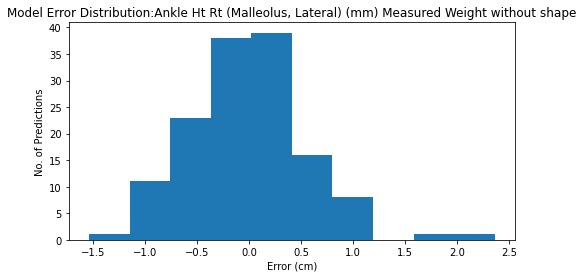

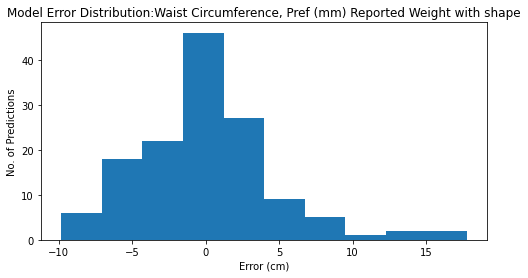

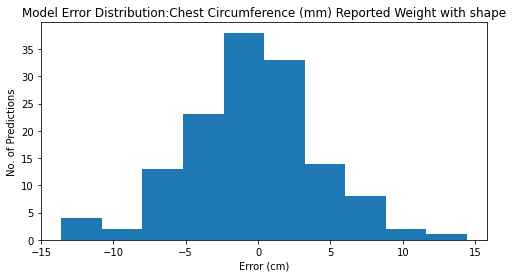

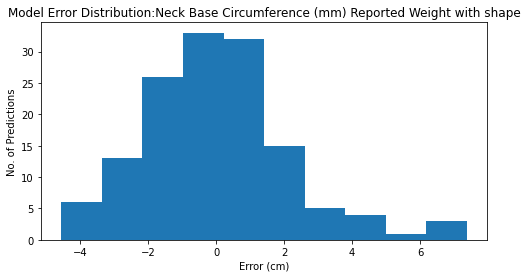

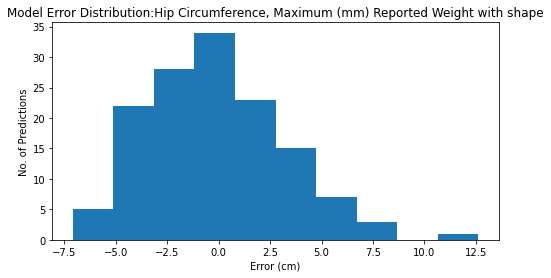

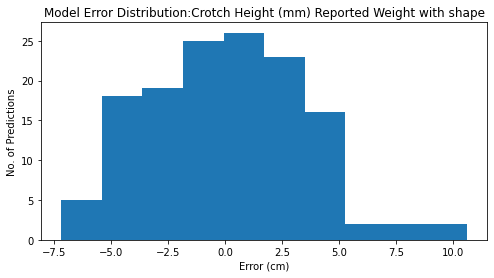

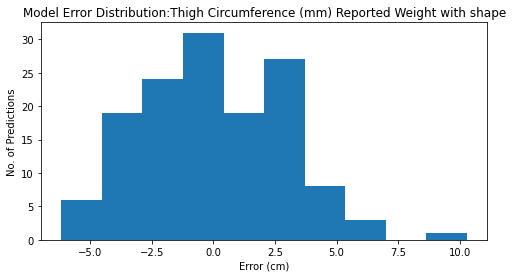

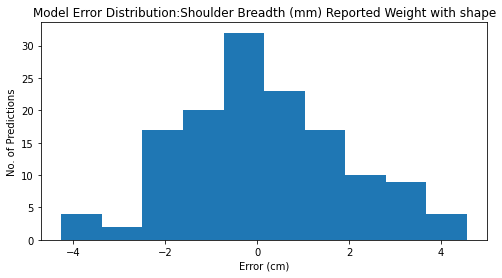

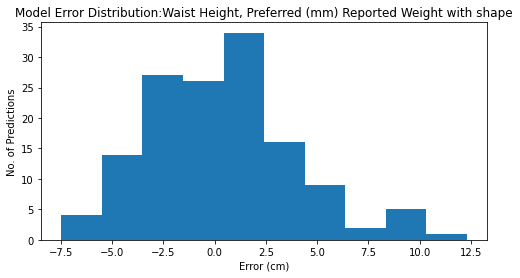

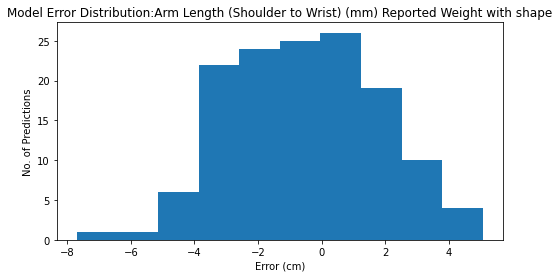

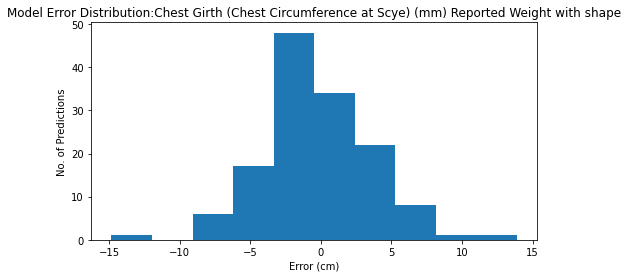

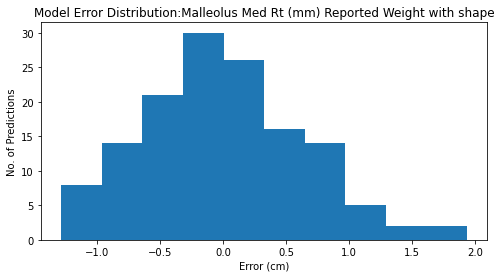

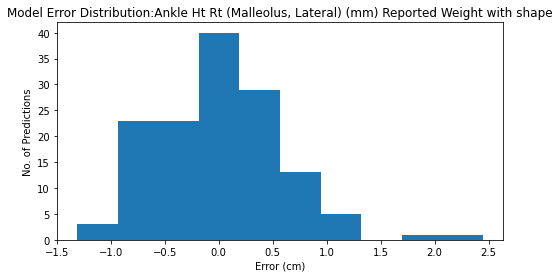

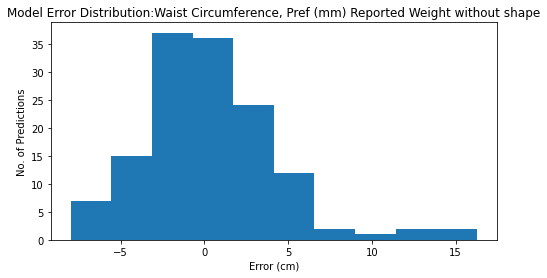

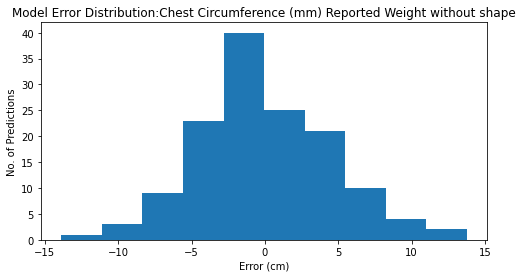

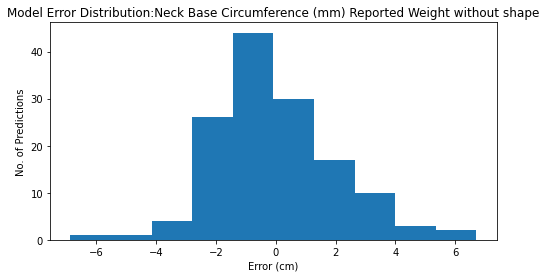

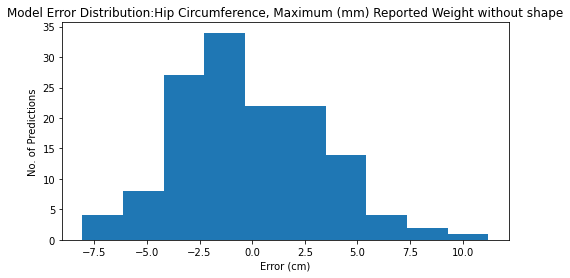

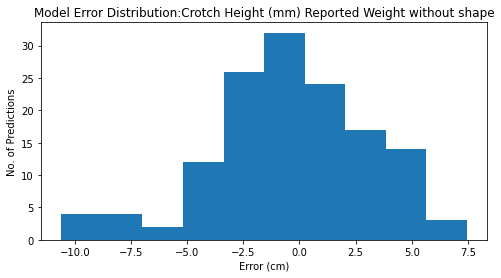

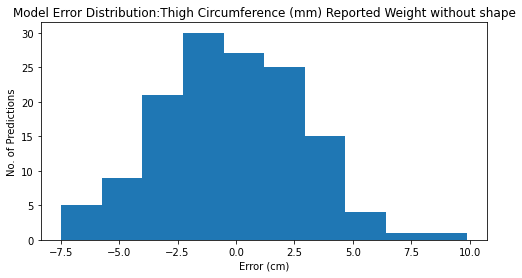

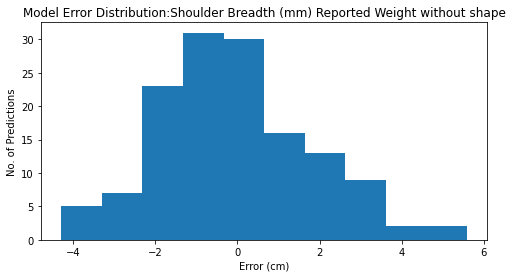

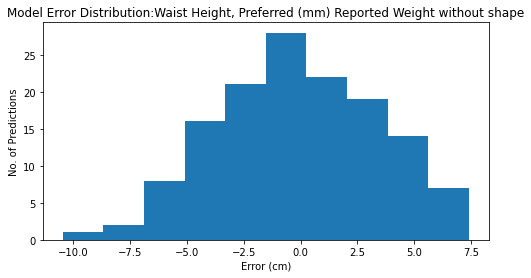

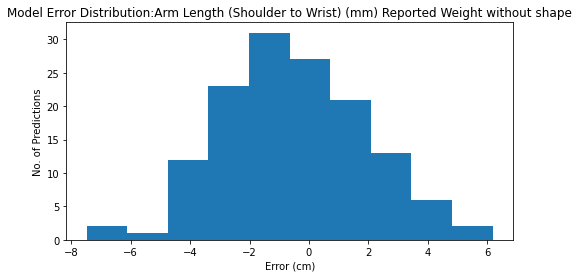

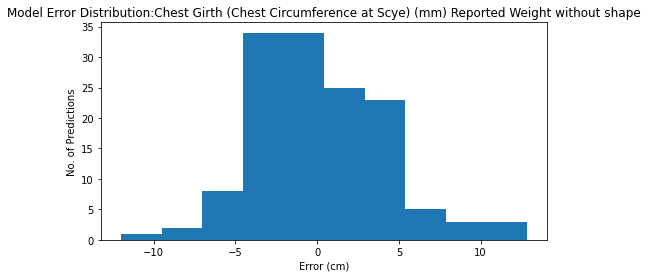

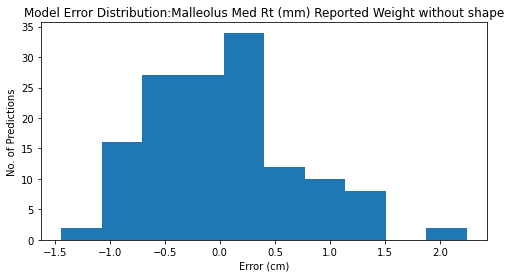

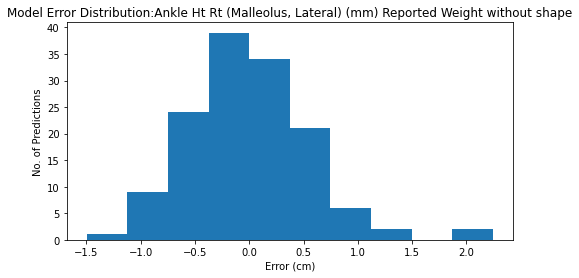

In [ ]:
for x in dict:
    pred_df=dict[x]
    target_df=y_test
    for feature in measurement: 
        target=target_df[feature].to_numpy()
        pred=pred_df[feature].to_numpy()
        error=(np.subtract(target,pred))
        plot_error_distribution(error,feature+ " "+ x)
    

In [12]:
reported_shape.sort_values(by=measurement)
reported_without_shape.sort_values(by=measurement)


,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
83,66.890643,80.414282,41.083395,86.611548,74.374390,48.372589,37.883456,95.002625,56.638647,78.683868,5.978729,7.134784
74,67.465540,81.458026,40.907721,89.729913,72.429938,50.194577,38.468613,93.058313,55.829163,79.717505,5.903592,6.974106
149,68.079279,81.173547,40.594702,90.627405,70.620227,50.515469,38.515851,90.533759,54.624567,79.224023,5.765914,6.704743
89,68.579553,82.154480,40.968826,90.671448,72.308905,50.699866,38.592117,92.897705,55.538422,80.273297,5.892463,6.935988
167,68.585040,85.224451,41.074188,92.258838,71.349701,52.436218,39.592151,92.688995,55.171722,81.620642,5.861961,7.008082
...,...,...,...,...,...,...,...,...,...,...,...,...
68,101.232507,117.354639,47.616061,117.623718,75.488940,69.782178,47.038574,103.512097,58.790369,108.180908,6.704661,8.171362
126,101.464532,114.946094,48.578302,117.247205,86.969537,67.622906,46.752719,110.177710,63.211554,106.601428,7.260288,8.449064
158,101.626965,115.890564,47.305667,116.524402,77.623254,68.429535,46.167496,103.466931,58.999683,106.615771,6.795234,8.036852
28,105.111462,118.291089,47.422043,118.549194,75.387701,69.679041,46.350009,101.299219,57.838806,108.157434,6.717503,7.880510


In [13]:
for feauture in measurement:
    print(feauture)
    print("25 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),25))
    print("50 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),50))
    print("75 percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),75))
    print("70th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),70))
    print("80th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),80))
    print("90th percentile of reported shape: ", np.percentile(reported_shape[feature].to_numpy(),90))
    print("-----------------------------")


Waist Circumference, Pref (mm)
25 percentile of reported shape:  72.77566528320312
50 percentile of reported shape:  75.87078247070312
75 percentile of reported shape:  84.11891479492188
70th percentile of reported shape:  82.25734985351562
80th percentile of reported shape:  87.71256591796876
90th percentile of reported shape:  94.83431274414062
-----------------------------
Chest Circumference (mm)
25 percentile of reported shape:  72.77566528320312
50 percentile of reported shape:  75.87078247070312
75 percentile of reported shape:  84.11891479492188
70th percentile of reported shape:  82.25734985351562
80th percentile of reported shape:  87.71256591796876
90th percentile of reported shape:  94.83431274414062
-----------------------------
Neck Base Circumference (mm)
25 percentile of reported shape:  72.77566528320312
50 percentile of reported shape:  75.87078247070312
75 percentile of reported shape:  84.11891479492188
70th percentile of reported shape:  82.25734985351562
80th perc

In [14]:
for feauture in measurement:
    print(feauture)
    print("25 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),25))
    print("50 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),50))
    print("75 percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),75))
    print("70th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),70))
    print("80th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),80))
    print("90th percentile of reported shape: ", np.percentile(reported_without_shape[feature].to_numpy(),90))
    print("-----------------------------")


Waist Circumference, Pref (mm)
25 percentile of reported shape:  73.89606323242188
50 percentile of reported shape:  76.9205322265625
75 percentile of reported shape:  83.44203491210938
70th percentile of reported shape:  81.02509521484374
80th percentile of reported shape:  87.68297119140625
90th percentile of reported shape:  94.03193969726563
-----------------------------
Chest Circumference (mm)
25 percentile of reported shape:  73.89606323242188
50 percentile of reported shape:  76.9205322265625
75 percentile of reported shape:  83.44203491210938
70th percentile of reported shape:  81.02509521484374
80th percentile of reported shape:  87.68297119140625
90th percentile of reported shape:  94.03193969726563
-----------------------------
Neck Base Circumference (mm)
25 percentile of reported shape:  73.89606323242188
50 percentile of reported shape:  76.9205322265625
75 percentile of reported shape:  83.44203491210938
70th percentile of reported shape:  81.02509521484374
80th percent